# SpecOneD Tutorital 2
## Advanced spectral manipulation

We begin the tutorial by loading the modules an a spectrum.

In [1]:
from astrotools.speconed import speconed as sod

In [2]:
spec = sod.SpecOneD() 
spec.read_from_fits('data/J0341+1720.fits')


## 4 More single spectra manipulations
### 4.1 Redshifting [.redshift()]
It is quite simple to redshift a spectrum by hand. However, we implemented a quick method for this. While the spectra will look identical, the dispersion changes.

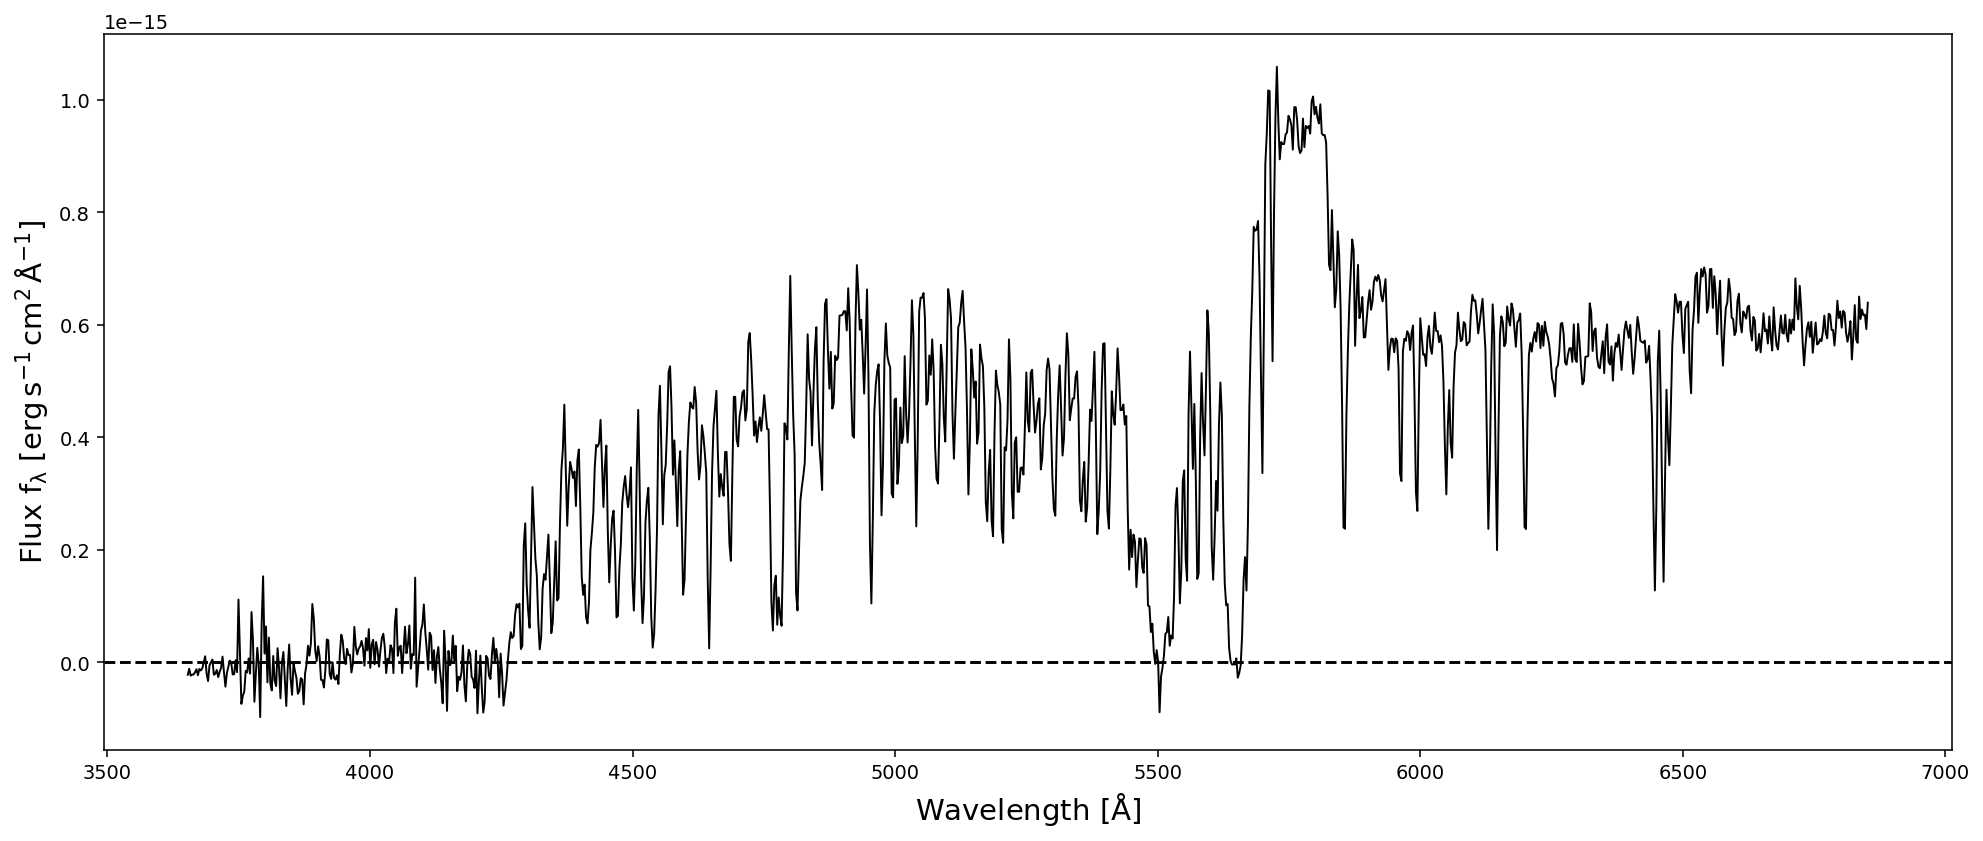

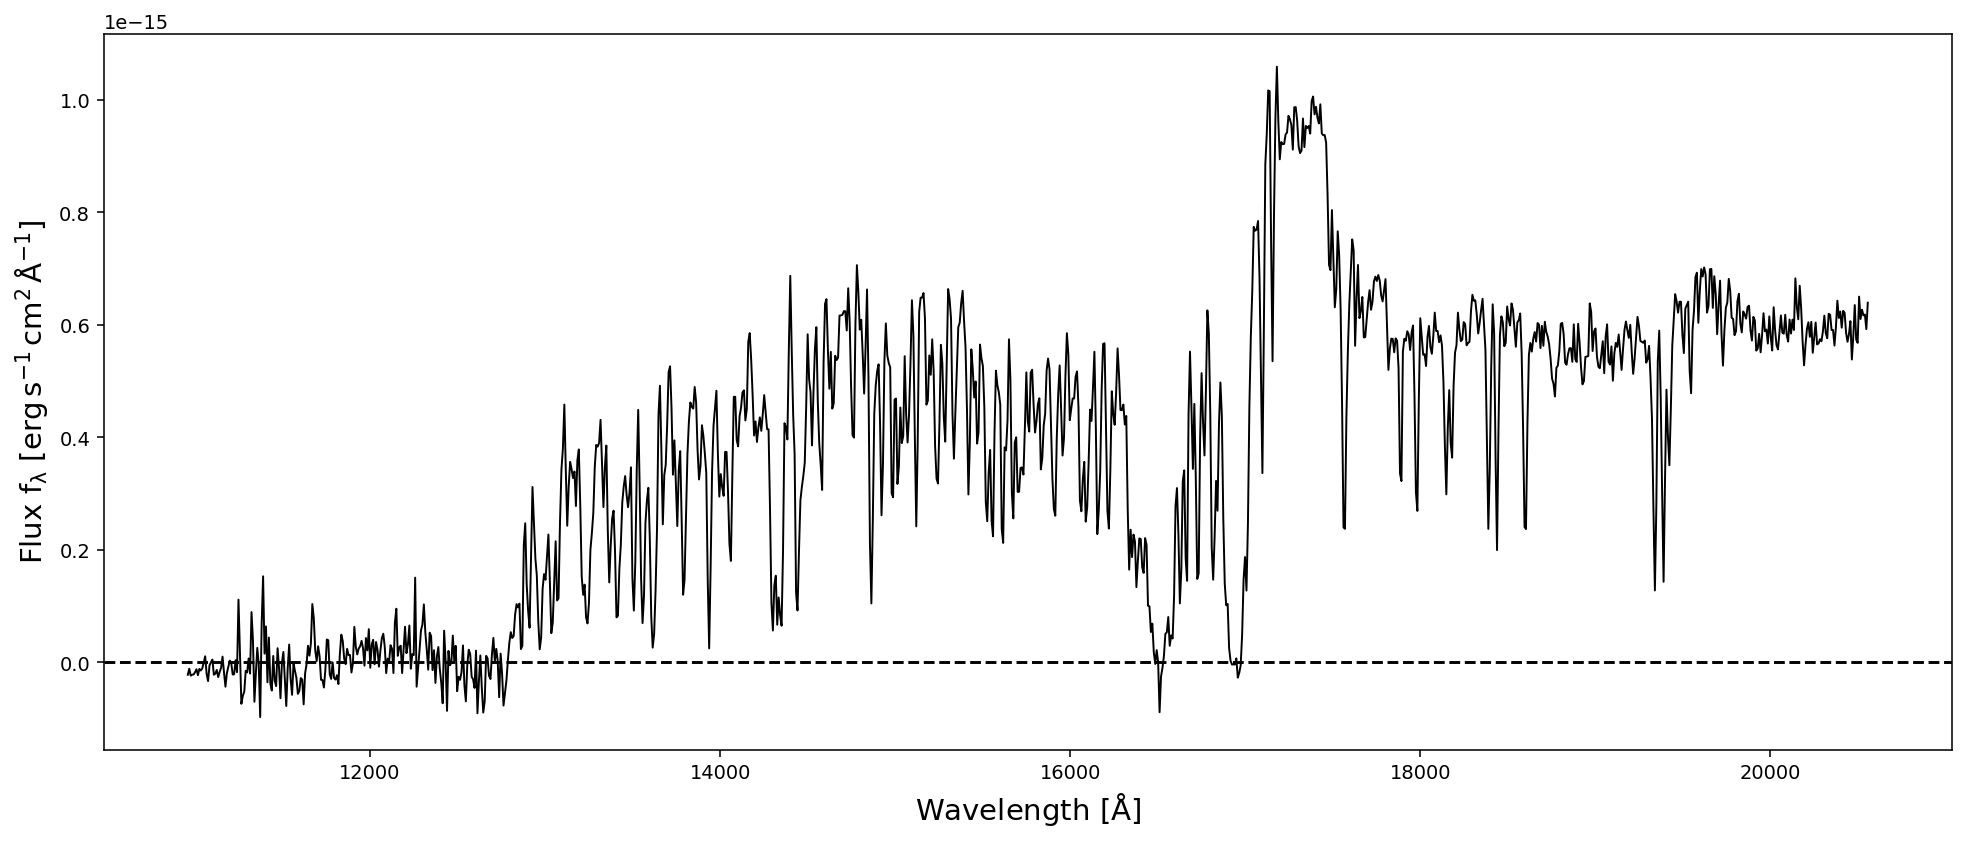

In [3]:
spec.plot()
spec.redshift(z=2).plot()

### 4.2 Reddening [.redden(), .deredden()]
SpecOneD makes use of the python extinction module (https://extinction.readthedocs.io/en/latest/). The redden function applies different functions from the extinction module to redden the spectrum according to the specified 'a_v' and 'r_v' and 'extinction_law'.

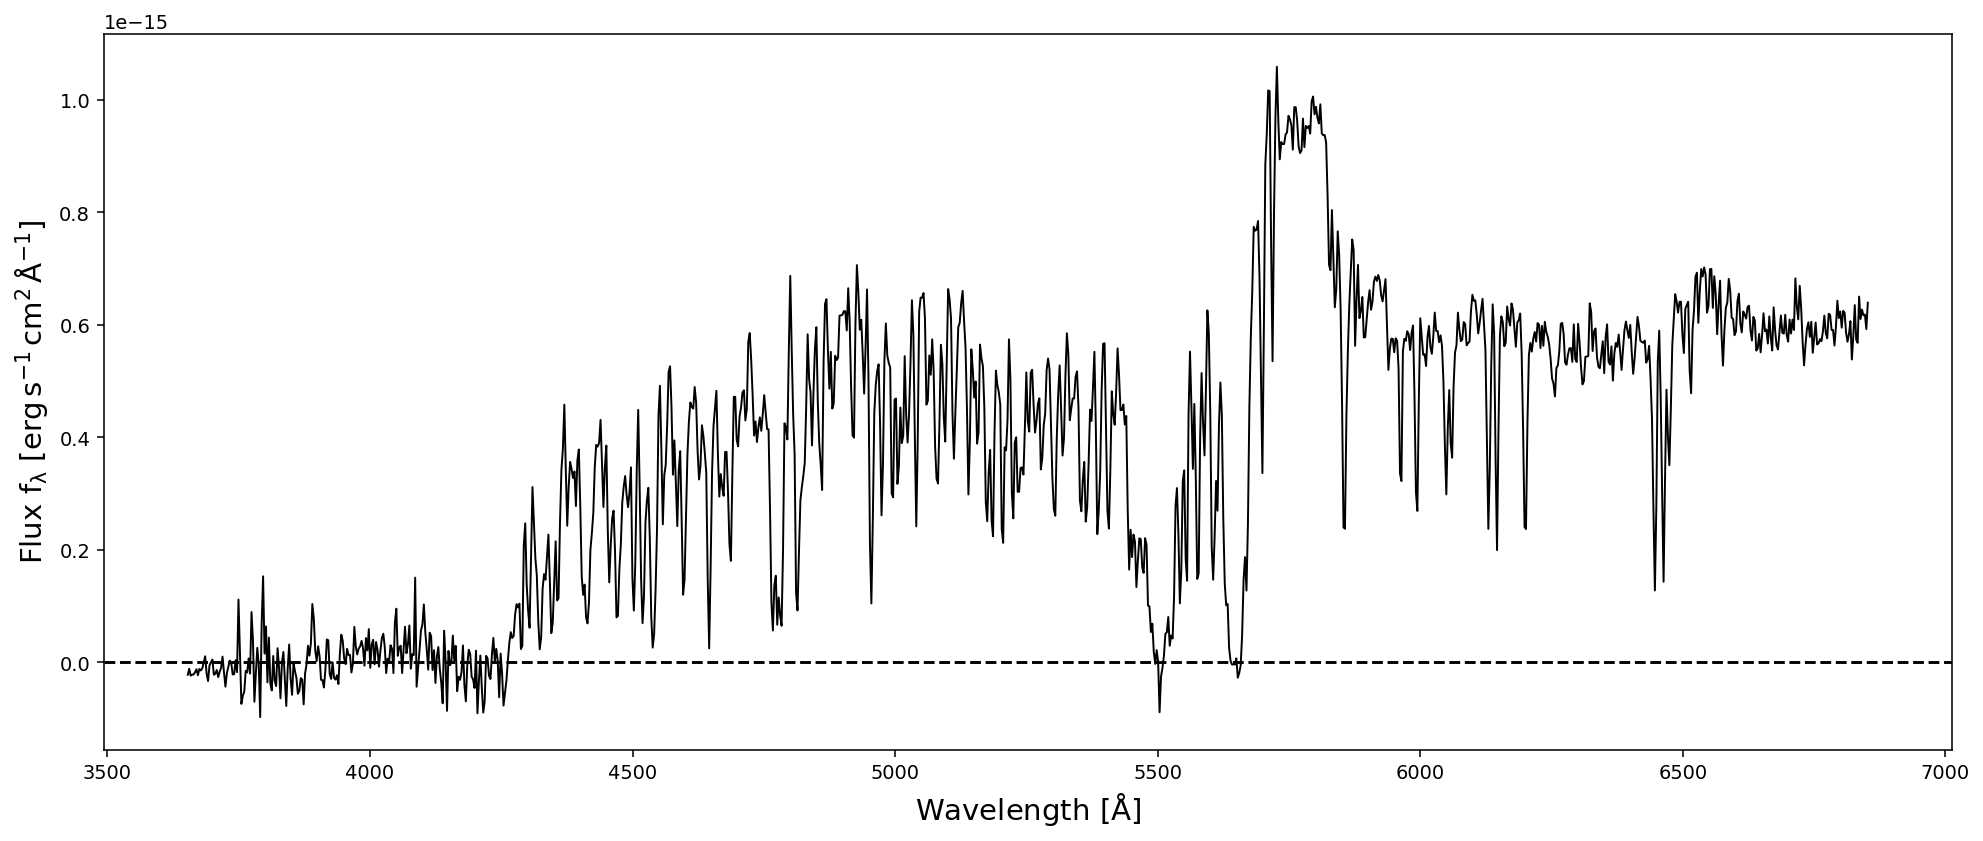

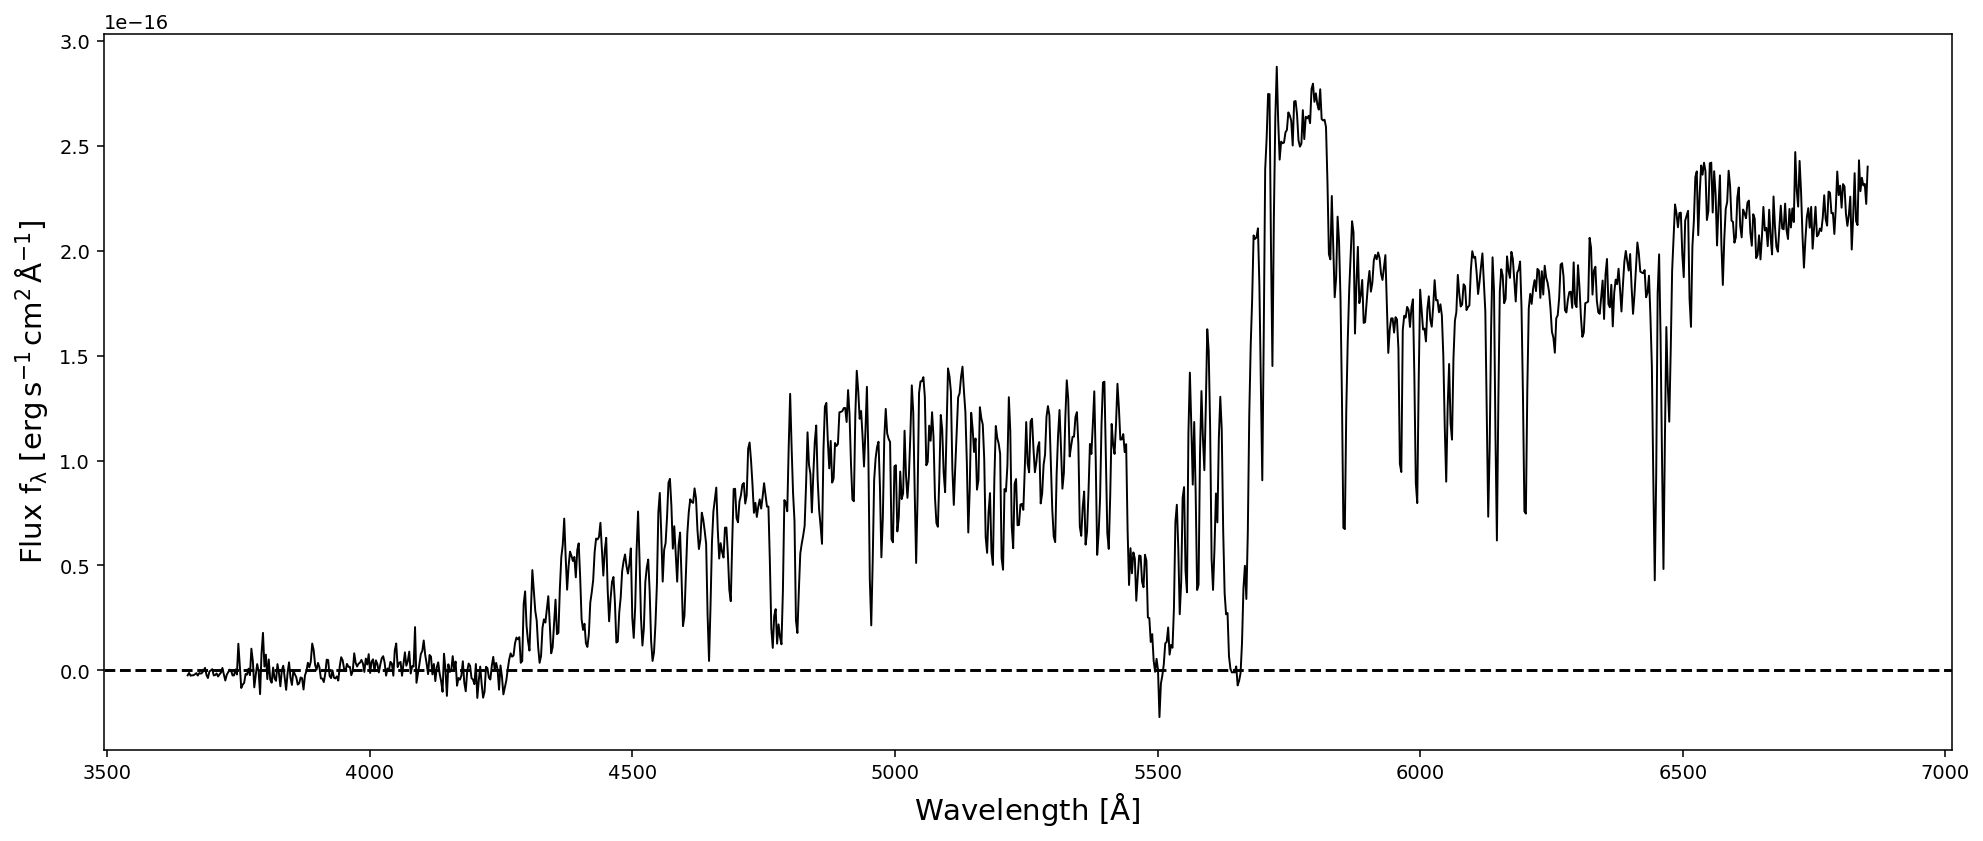

In [11]:
spec.plot()
spec.redden(a_v=1.5, r_v=3.1, extinction_law='calzetti00').plot()

We have further implemented a function to deredden the spectrum [.deredden()], which uses the same arguments.

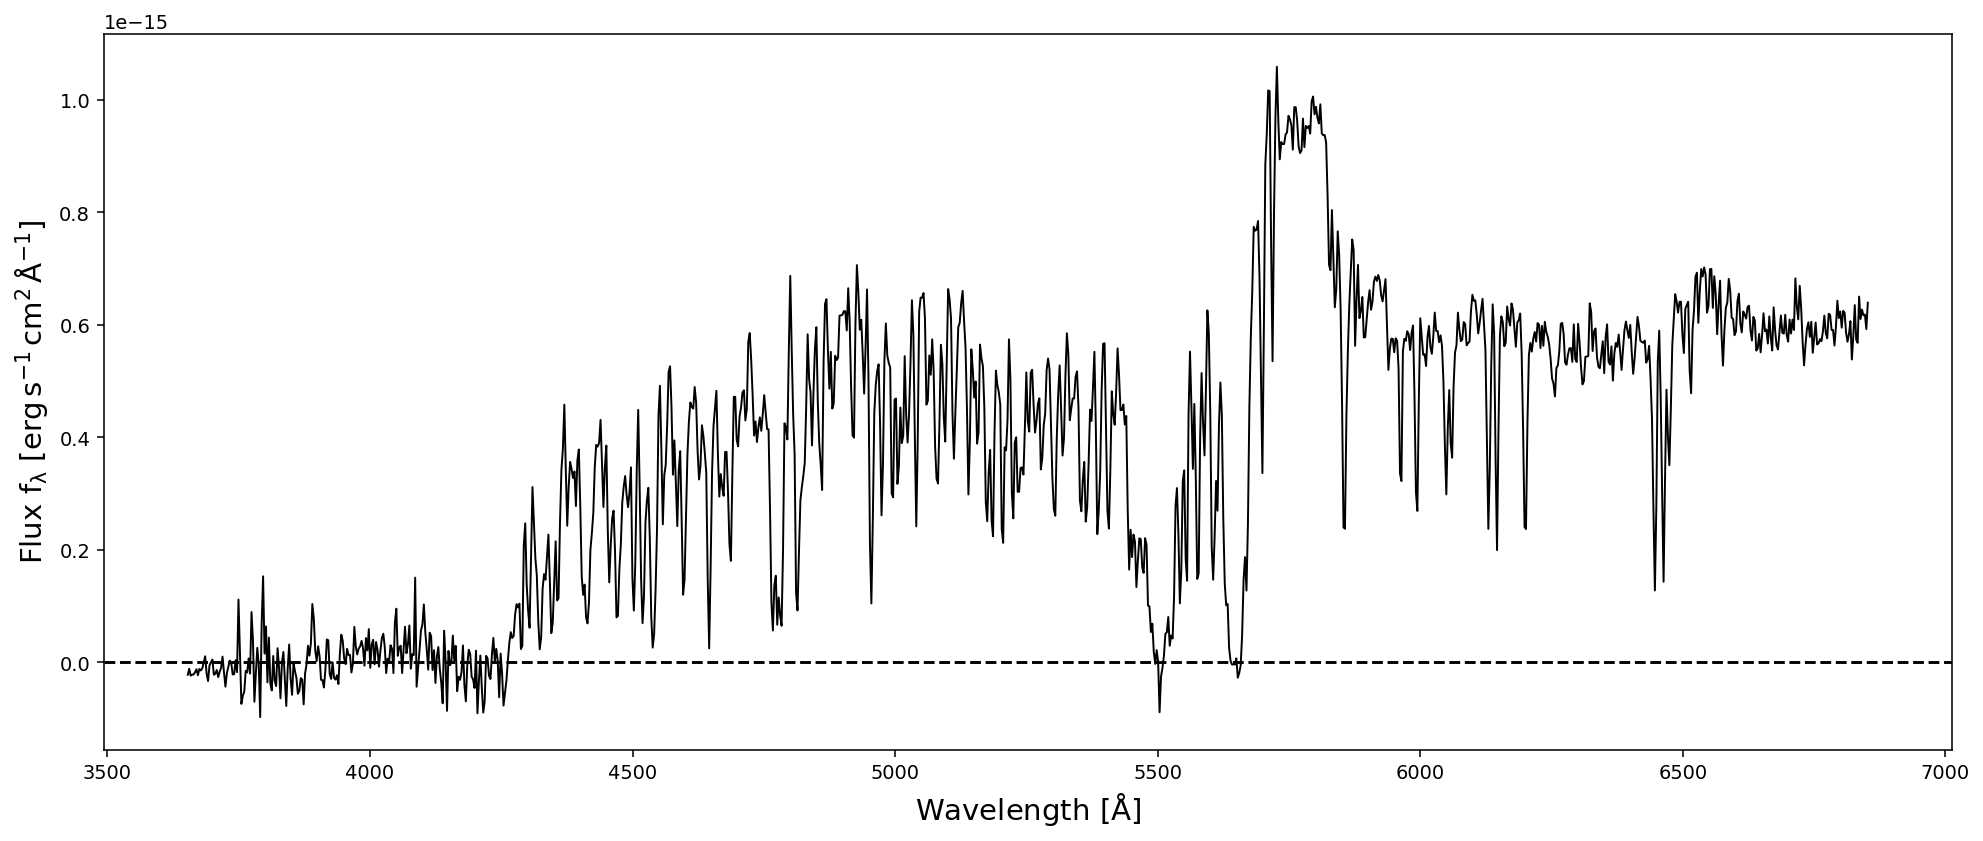

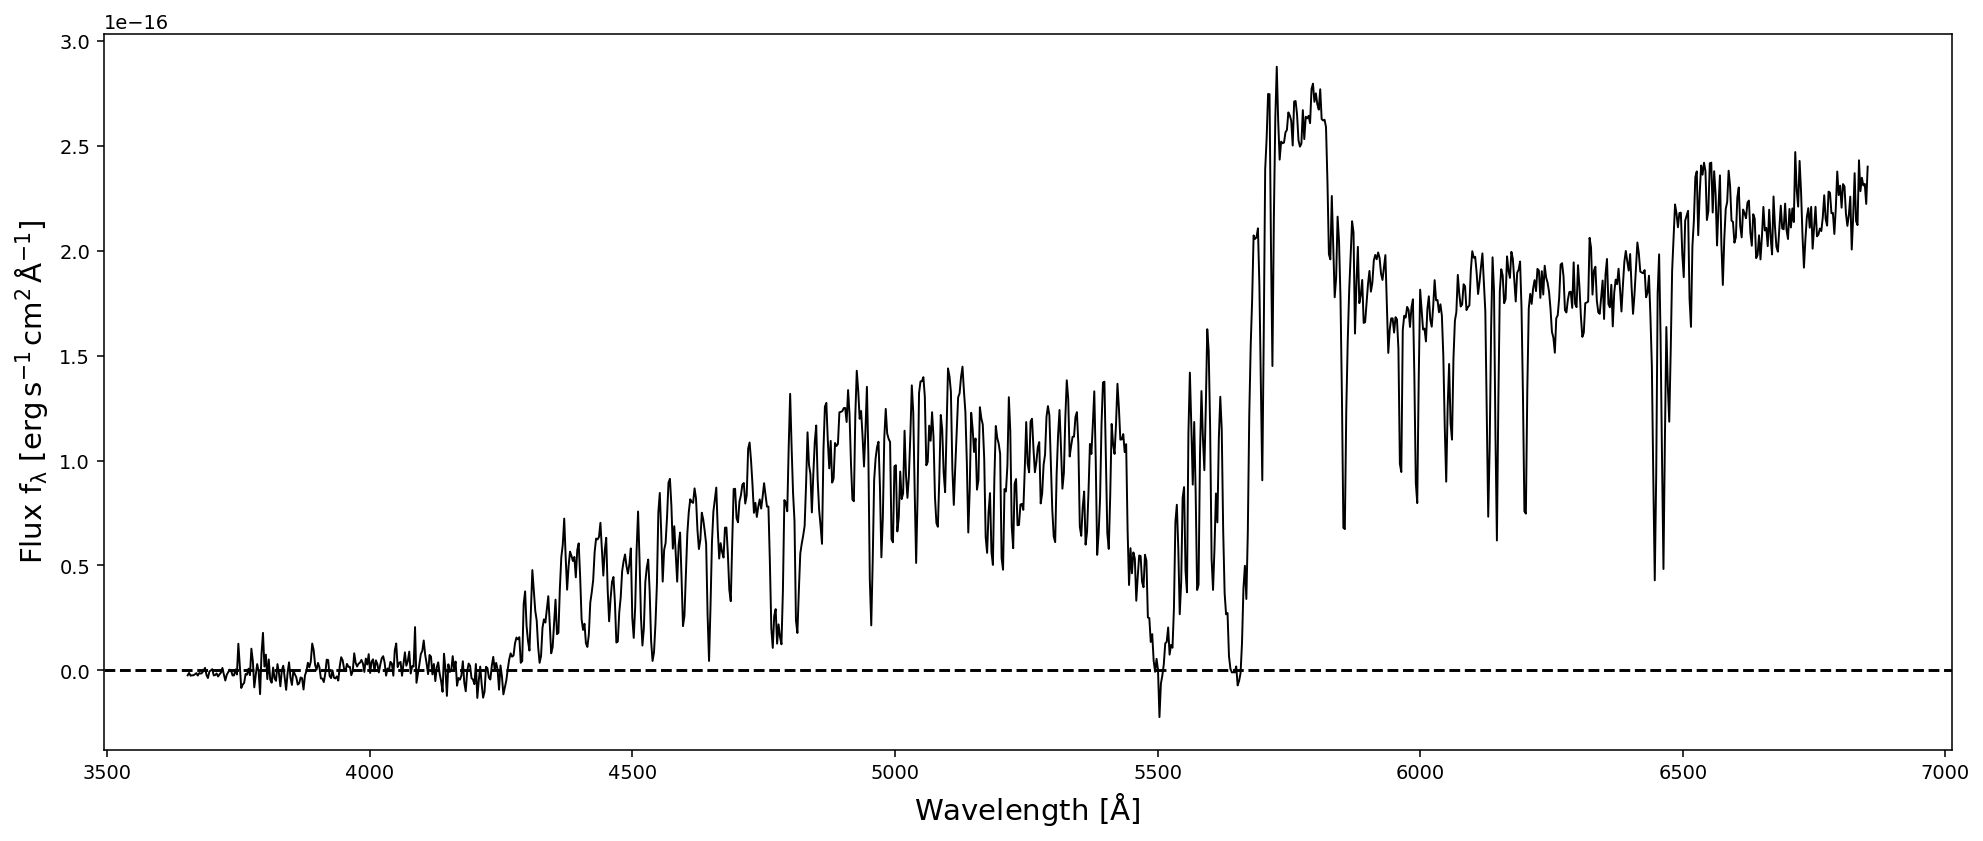

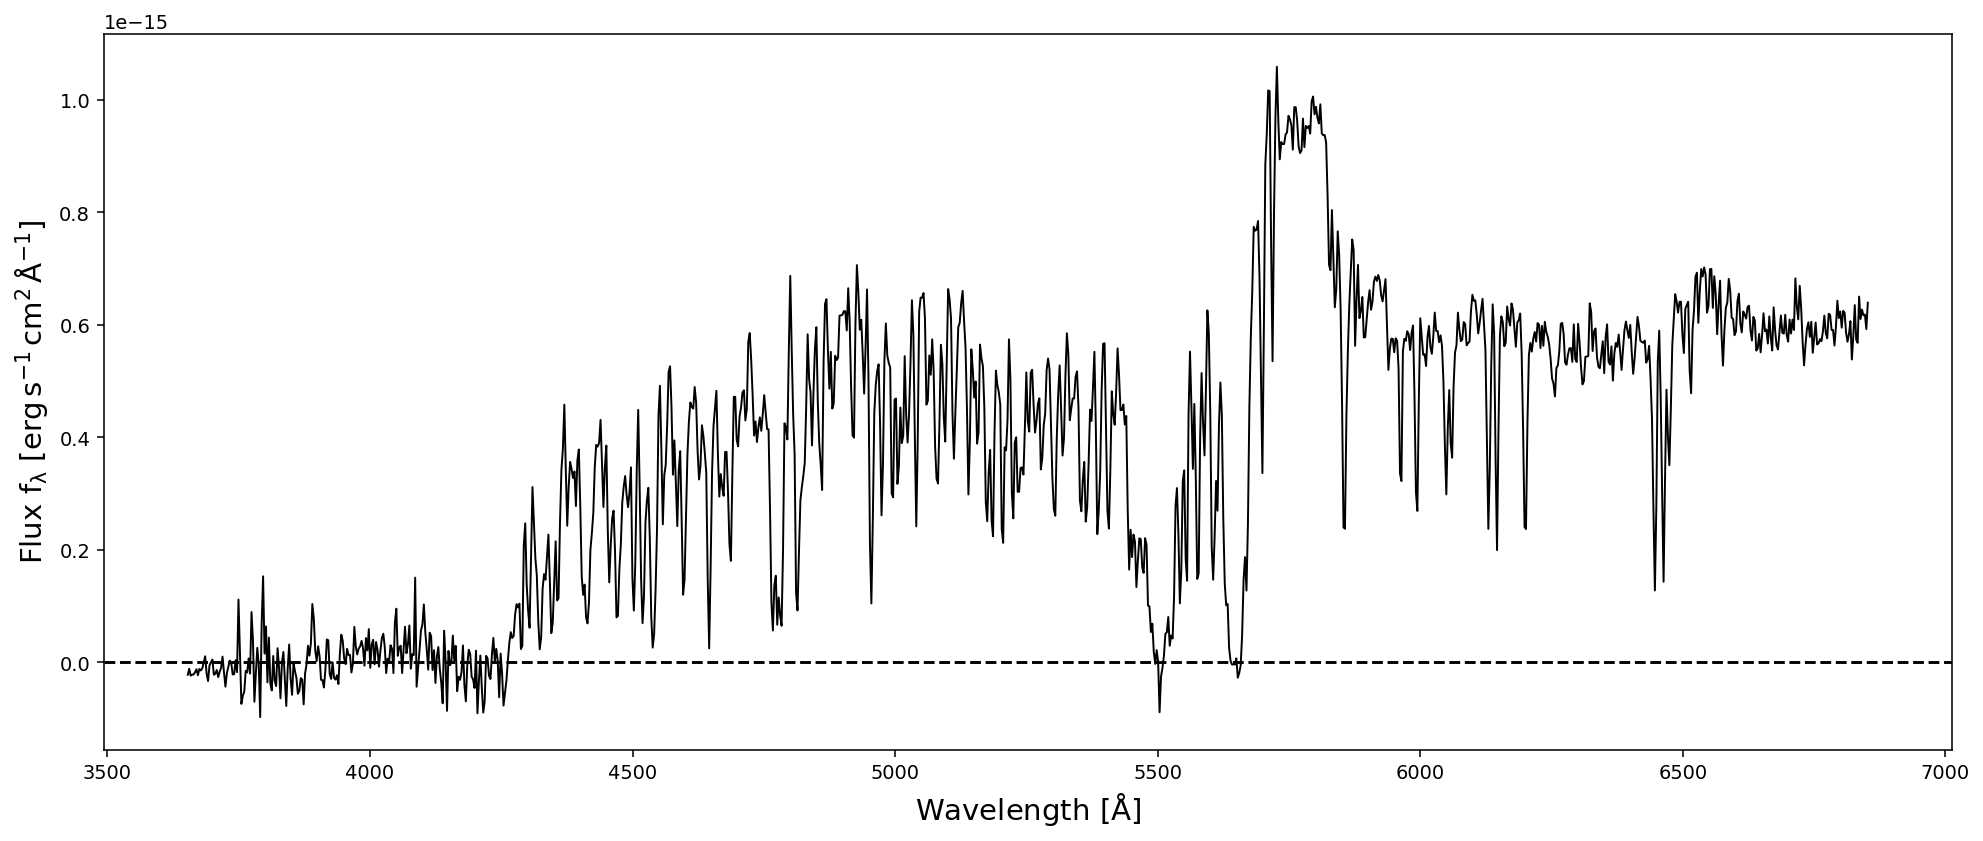

In [15]:
spec.plot()
spec_reddened = spec.redden(a_v=1.5, r_v=3.1, extinction_law='calzetti00')
spec_reddened.plot()
spec_dereddened = spec_reddened.deredden(a_v=1.5, r_v=3.1, extinction_law='calzetti00')
spec_dereddened.plot()

### 4.3 Iterative sigma clipping of the flux [.sigmaclip_flux()]
In some instances cosmic rays or other artifacts make it into the spectrum. For this purpose the SpecOneD module provides a method for iterative sigma clipping of the flux values. This function does not modify the spectral flux itself but rather populates the SpecOneD.mask property. Therefore the .plot() function will ignore these masked values. 

The following example uses very small values for the specified standard deviations (low, up) for display purposes.

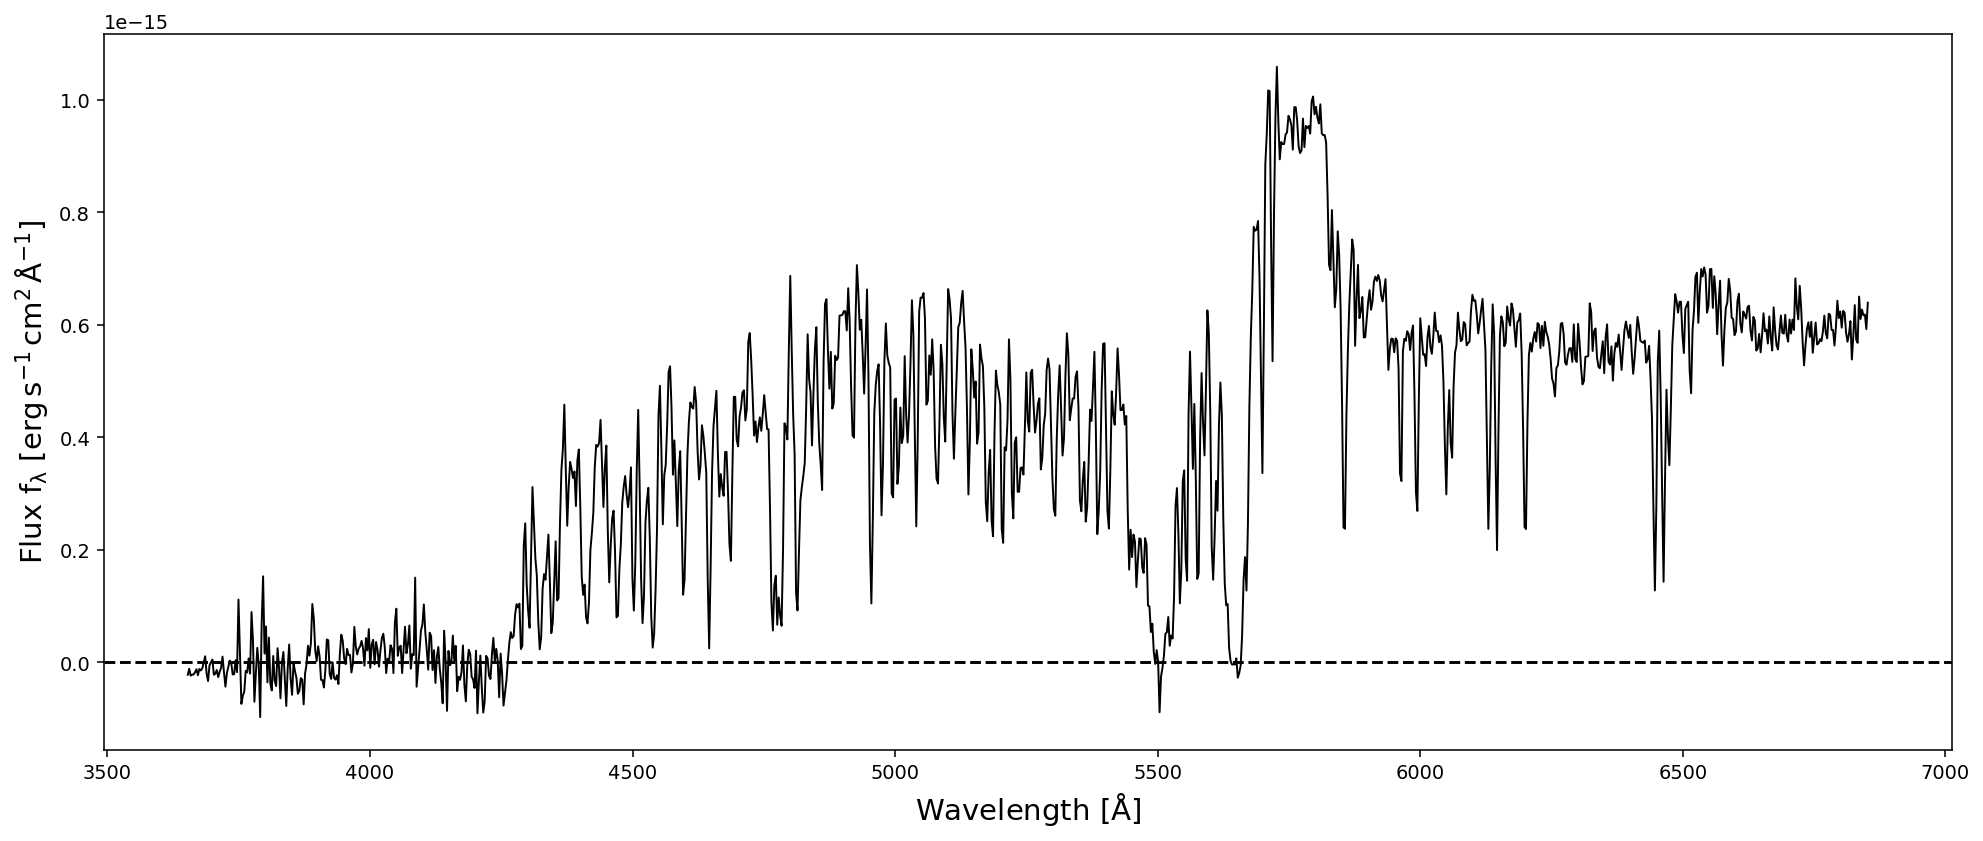

[False False False ... False False False] 1161 0
[False False False ... False False False] 1161 0
[ True False  True ...  True  True False] 393 0
[ True False  True ...  True  True False] 393 0


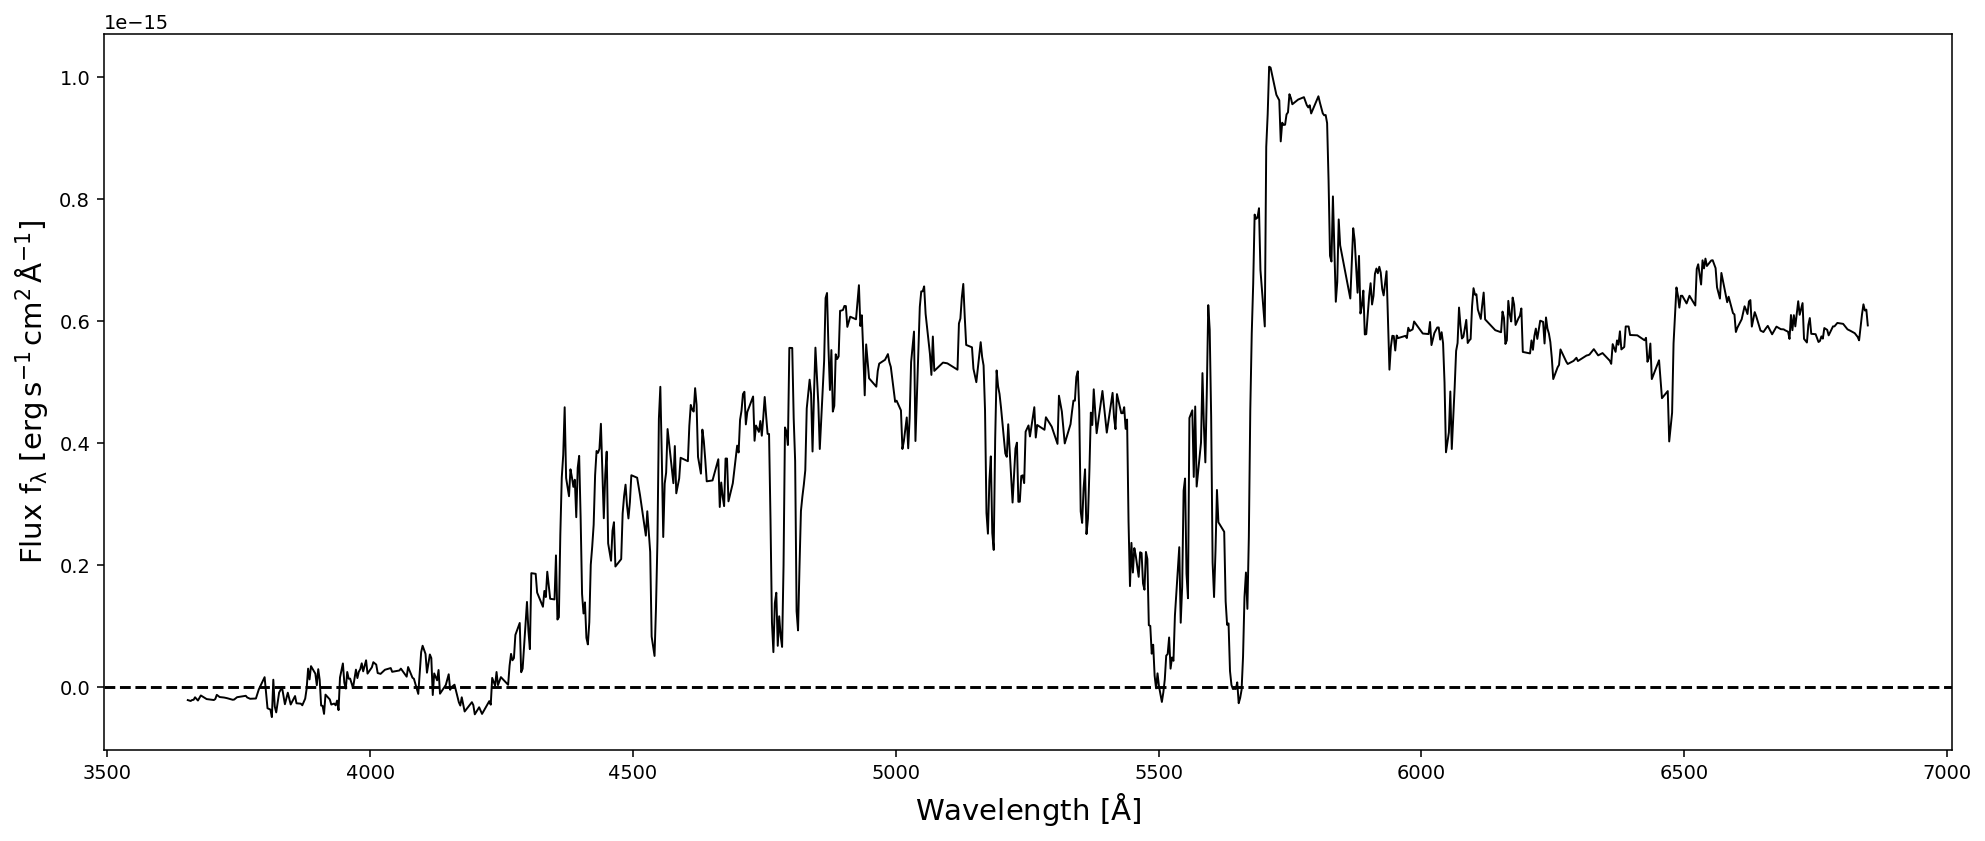

In [33]:
spec.plot()
spec.sigmaclip_flux(low=1.5, up=1.5, binsize=10, niter=5).plot()

## 5 The PassBand  and FlatSpectrum classes
Before we continue with some advanced manipulation methods we are introducing the PassBand and FlatSpectrum classes, that will be used in this tutorial. Both classes are derived from the SpecOneD class. Let's begin by loading the modules

In [16]:
from astrotools.speconed.flatspectrum import FlatSpectrum
from astrotools.speconed.passband import PassBand

### 5.1 The PassBand class
The astrotools package includes a range of passbands in the speconed data folder. We will now load two different passbands and display them.

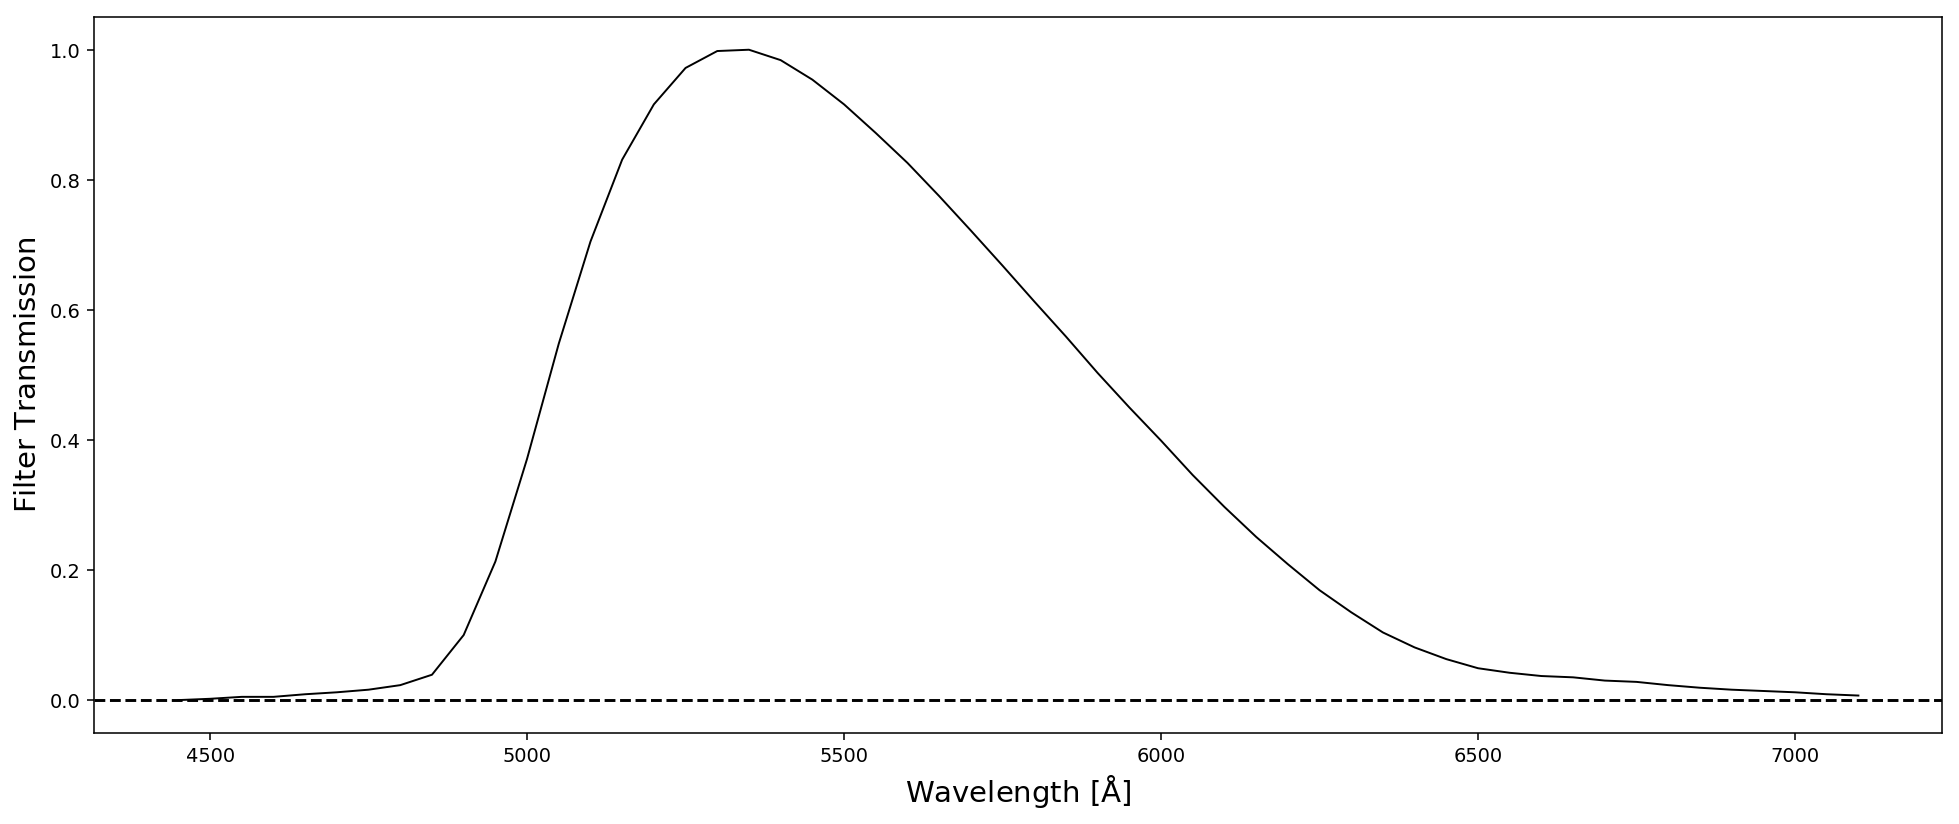

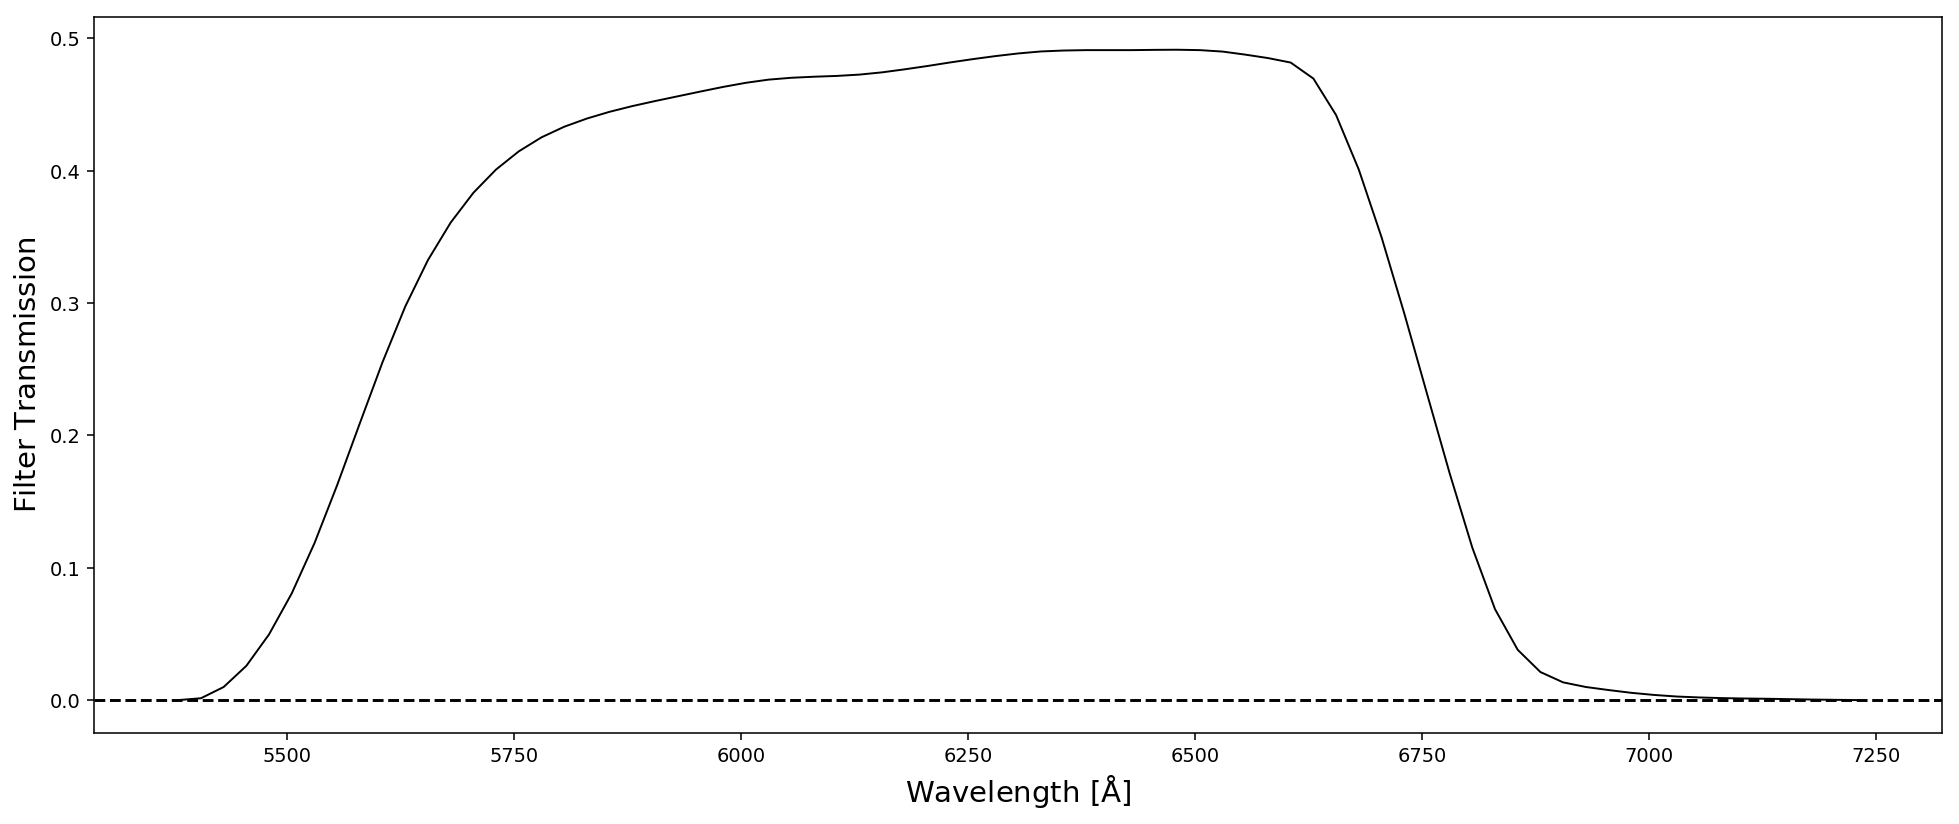

In [6]:
V = PassBand(passband_name='Johnson-V')
V.plot()
SDSS_r = PassBand(passband_name='SDSS-r')
SDSS_r.plot()

### 5.2 The FlatSpectrum class 
The FlatSpectrum class is only used for the calculation of magnitudes from spectra. The class generates a flat spectrum with a constant flux over a specified dispersion range.

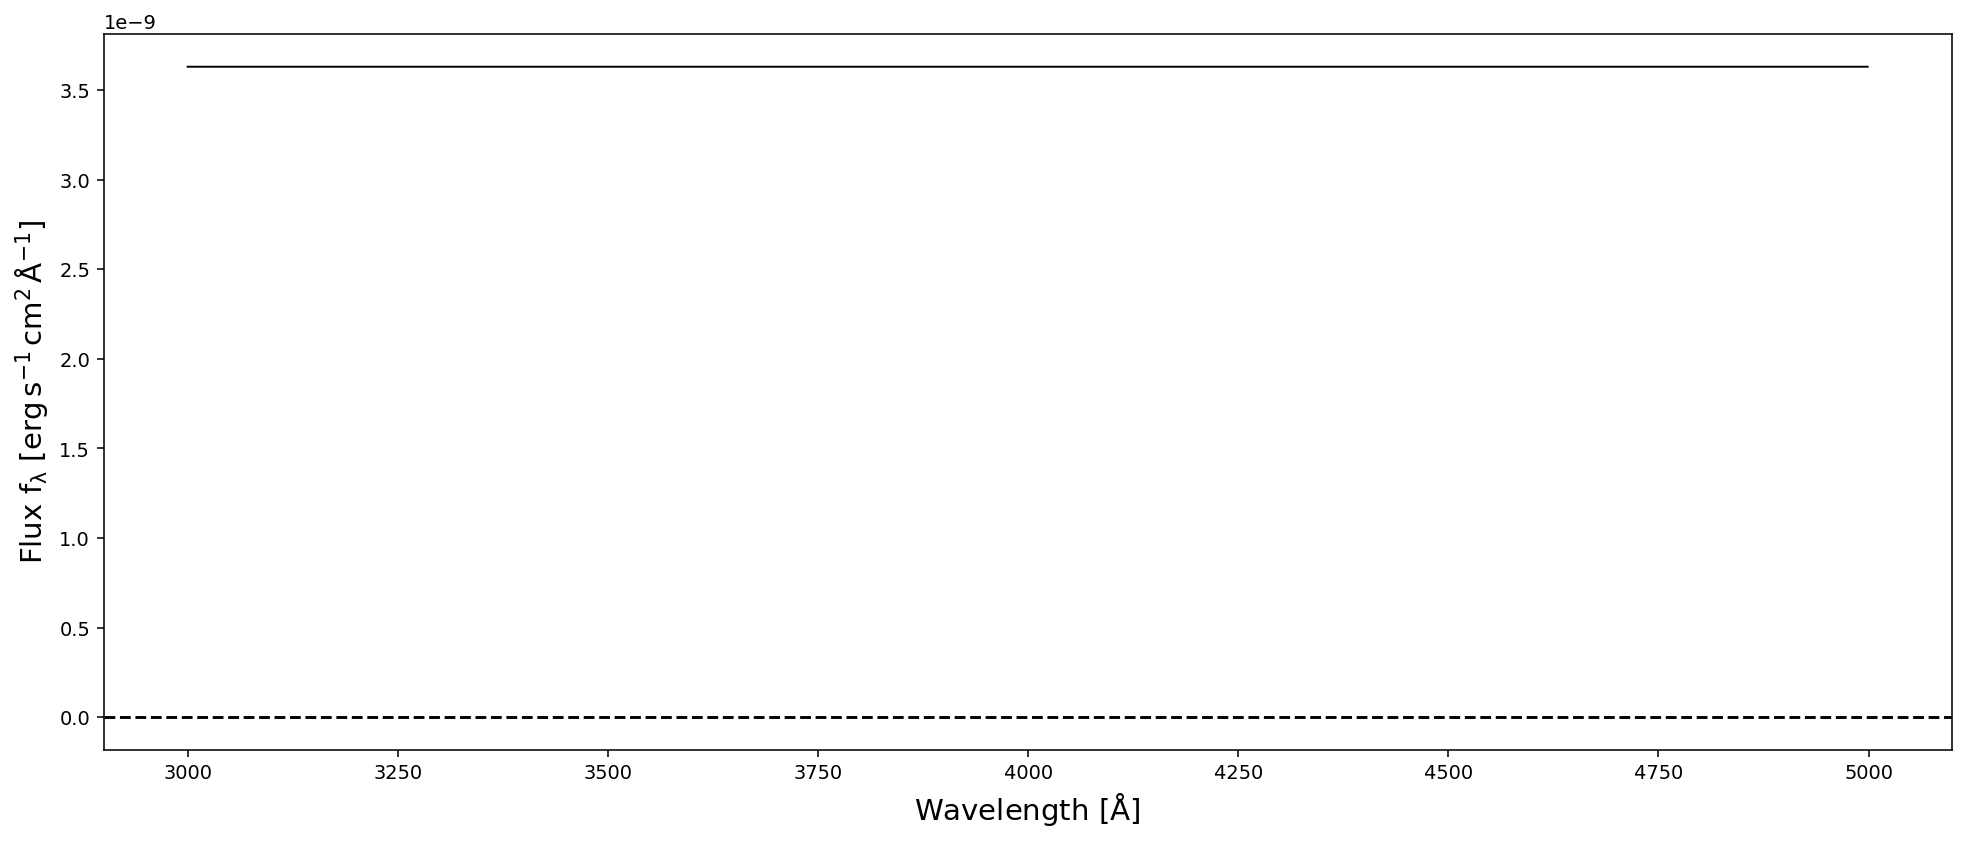

In [7]:
import numpy as np 

dispersion = np.arange(3000,5000,1)

flat_lam = FlatSpectrum(flat_dispersion = dispersion, unit='f_lam')
flat_lam.plot()

## 6 Magnitude calculation and normalization 
### 6.1 Calculating a passband magnitude [.calculate_passband_magnitude()]
The SpecOneD module uses the FlatSpectrum class to calculate a magnitude from a SpecOneD object and given PassBand object. Let us now load the spectrum of Feige 56 from the flux_standards folder. 
It has a known magnitude of V=11.05 (see https://www.eso.org/sci/observing/tools/standards/spectra/feige56.html)

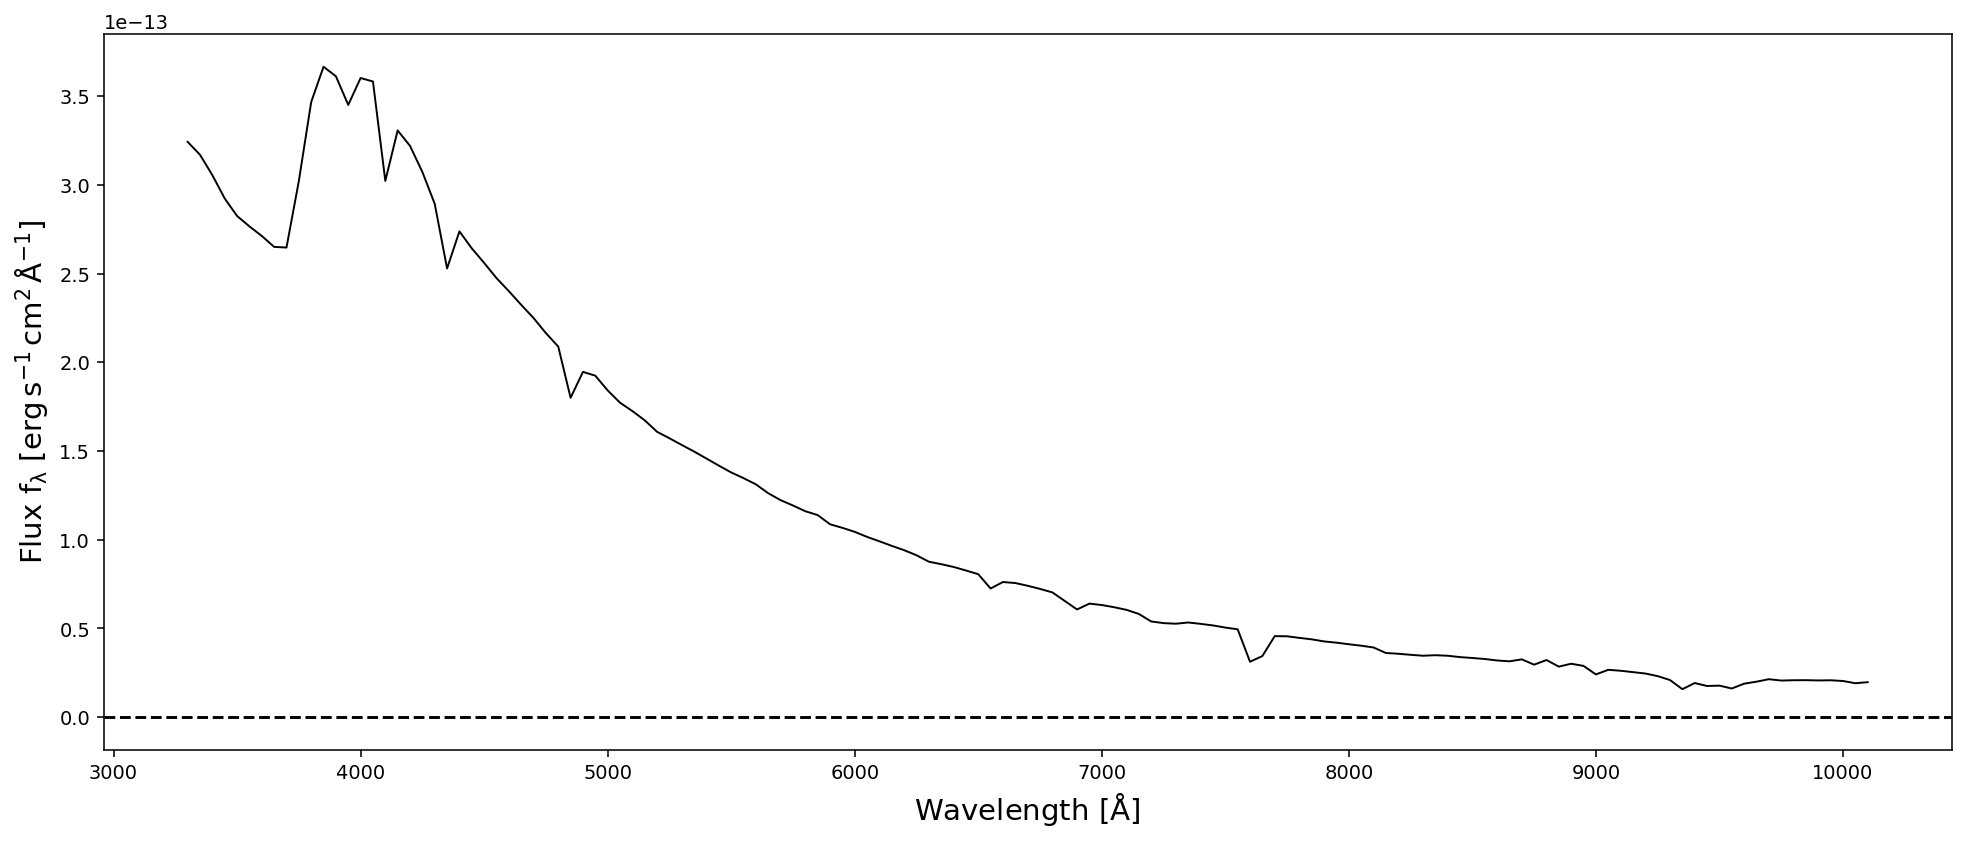

In [17]:
from astrotools.speconed.speconed import datadir
data = np.genfromtxt(datadir+'flux_standards/ffeige56.dat')
feige56 = SpecOneD(dispersion=data[:,0],flux=data[:,1]*1e-16,unit='f_lam')
feige56.plot()

Remember that we already initialized two PassBand objects (V and r) above. We are going to use them here. 

In [18]:
V_mag = feige56.calculate_passband_magnitude(V)
r_mag = feige56.calculate_passband_magnitude(SDSS_r)
print ("The given magnitude for this spectrophotometric standard is V = 11.05")
print ("Johnson V-band magnitude:", V_mag)
print ("SDSS r-band magnitude:", r_mag)

The given magnitude for this spectrophotometric standard is V = 11.05
Johnson V-band magnitude: 11.043408634770733
SDSS r-band magnitude: 11.187298741179728


### 6.2 Renormalizing a spectrum by magnitude [.renormalize_by_magnitude()]
We can further change the normalization of the spectrum to reflect a specified magnitude in a given passband.

In [19]:
feige56_normalized = feige56.renormalize_by_magnitude(11.05,SDSS_r)
V_mag = feige56_normalized.calculate_passband_magnitude(V)
r_mag = feige56_normalized.calculate_passband_magnitude(SDSS_r)
print ("We normalized the spectrum top r = 11.05")
print ("Johnson V-band magnitude:", V_mag)
print ("SDSS r-band magnitude:", r_mag)

We normalized the spectrum top r = 11.05
Johnson V-band magnitude: 10.906109893591008
SDSS r-band magnitude: 11.050000000000002


#### Tutorial 3 will continue with functions that operate on two SpecOneD objects.